# Imports

In [12]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [13]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1 
)


# Simulation setup

In [14]:
population_size = 1000
simulation_cycles = 90 # days

In [15]:
seed = 313

In [16]:
np.random.seed(seed)
scenario = {}

# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [17]:
sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
#model = CovidModel(debug = True)
model = CovidModel()
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

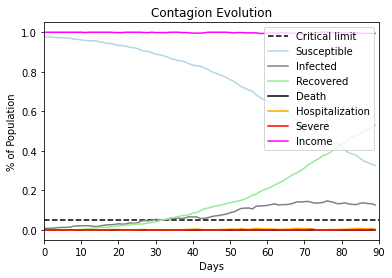

In [18]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [19]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[9483, 8244, 5262, 5348, 7005, 5763, 273, 3438, 4911, 6145, 7366, 4172, 1963, 9989, 351, 8574, 551, 1717, 1465, 5920, 3698, 1794, 1168, 1533, 1754, 2089, 404, 459, 1644, 9424]
run with seed 9483:
run with seed 8244:
run with seed 5262:
run with seed 5348:
run with seed 7005:
run with seed 5763:
run with seed 273:
run with seed 3438:
run with seed 4911:
run with seed 6145:
run with seed 7366:
run with seed 4172:
run with seed 1963:
run with seed 9989:
run with seed 351:
run with seed 8574:
run with seed 551:
run with seed 1717:
run with seed 1465:
run with seed 5920:
run with seed 3698:
run with seed 1794:
run with seed 1168:
run with seed 1533:
run with seed 1754:
run with seed 2089:
run with seed 404:
run with seed 459:
run with seed 1644:
run with seed 9424:
using average of time series:
stats on susceptible:
data: [0.42995892995893004, 0.2539888888888888, 0.9650777777777778, 0.9813777777777776, 0.9683666666666666, 0.29727777777777775,

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [20]:
sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)

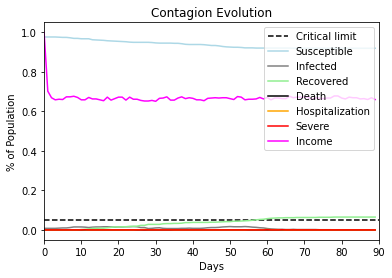

In [21]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [22]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[8734, 6949, 3646, 9735, 917, 5292, 4487, 8044, 8806, 3672, 3268, 6038, 1432, 5832, 5688, 3520, 7555, 4423, 3188, 8934, 4062, 46, 6223, 3699, 646, 1858, 560, 2108, 4146, 43]
run with seed 8734:
run with seed 6949:
run with seed 3646:
run with seed 9735:
run with seed 917:
run with seed 5292:
run with seed 4487:
run with seed 8044:
run with seed 8806:
run with seed 3672:
run with seed 3268:
run with seed 6038:
run with seed 1432:
run with seed 5832:
run with seed 5688:
run with seed 3520:
run with seed 7555:
run with seed 4423:
run with seed 3188:
run with seed 8934:
run with seed 4062:
run with seed 46:
run with seed 6223:
run with seed 3699:
run with seed 646:
run with seed 1858:
run with seed 560:
run with seed 2108:
run with seed 4146:
run with seed 43:
using average of time series:
stats on susceptible:
data: [0.9536, 0.9800000000000003, 0.943833333333333, 0.9830333333333333, 0.9299444444444444, 0.9726555555555557, 0.8806000000000002

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [23]:
sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

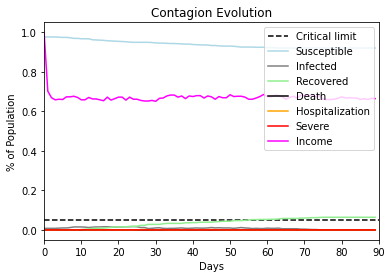

In [24]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [25]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[4454, 6843, 7995, 4221, 1341, 4967, 5549, 353, 1185, 7934, 180, 1881, 4650, 1928, 5096, 585, 1091, 2212, 4449, 2525, 3457, 7018, 1228, 6686, 2339, 937, 527, 2821, 5253, 4126]
run with seed 4454:
run with seed 6843:
run with seed 7995:
run with seed 4221:
run with seed 1341:
run with seed 4967:
run with seed 5549:
run with seed 353:
run with seed 1185:
run with seed 7934:
run with seed 180:
run with seed 1881:
run with seed 4650:
run with seed 1928:
run with seed 5096:
run with seed 585:
run with seed 1091:
run with seed 2212:
run with seed 4449:
run with seed 2525:
run with seed 3457:
run with seed 7018:
run with seed 1228:
run with seed 6686:
run with seed 2339:
run with seed 937:
run with seed 527:
run with seed 2821:
run with seed 5253:
run with seed 4126:
using average of time series:
stats on susceptible:
data: [0.6532111111111111, 0.8554888888888889, 0.9259518259518262, 0.7933777777777777, 0.7654333333333331, 0.6726222222222221, 0

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [26]:
sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

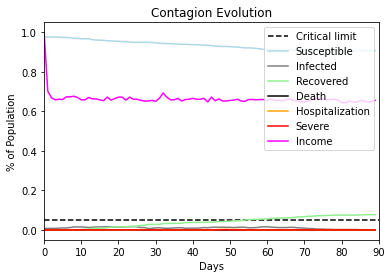

In [27]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [28]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[9469, 8630, 9889, 303, 4494, 6102, 7553, 8619, 6923, 8899, 7876, 1973, 2648, 8596, 2771, 6097, 78, 4643, 6536, 4636, 9618, 7968, 3333, 5536, 6009, 5201, 3392, 5148, 3628, 316]
run with seed 9469:
run with seed 8630:
run with seed 9889:
run with seed 303:
run with seed 4494:
run with seed 6102:
run with seed 7553:
run with seed 8619:
run with seed 6923:
run with seed 8899:
run with seed 7876:
run with seed 1973:
run with seed 2648:
run with seed 8596:
run with seed 2771:
run with seed 6097:
run with seed 78:
run with seed 4643:
run with seed 6536:
run with seed 4636:
run with seed 9618:
run with seed 7968:
run with seed 3333:
run with seed 5536:
run with seed 6009:
run with seed 5201:
run with seed 3392:
run with seed 5148:
run with seed 3628:
run with seed 316:
using average of time series:
stats on susceptible:
data: [0.9550888888888889, 0.9488, 0.9528888888888888, 0.6292777777777778, 0.7272666666666666, 0.9860555555555556, 0.622222222

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [29]:
sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

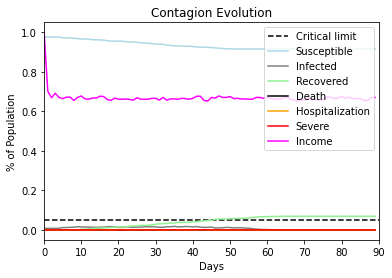

In [30]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [31]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[768, 7436, 6562, 6878, 2706, 4988, 6853, 6158, 5861, 3181, 6699, 2699, 110, 1492, 6812, 5681, 7496, 8183, 10, 7813, 7109, 1235, 8033, 8302, 5682, 3512, 2194, 1191, 3617, 5649]
run with seed 768:
run with seed 7436:
run with seed 6562:
run with seed 6878:
run with seed 2706:
run with seed 4988:
run with seed 6853:
run with seed 6158:
run with seed 5861:
run with seed 3181:
run with seed 6699:
run with seed 2699:
run with seed 110:
run with seed 1492:
run with seed 6812:
run with seed 5681:
run with seed 7496:
run with seed 8183:
run with seed 10:
run with seed 7813:
run with seed 7109:
run with seed 1235:
run with seed 8033:
run with seed 8302:
run with seed 5682:
run with seed 3512:
run with seed 2194:
run with seed 1191:
run with seed 3617:
run with seed 5649:
using average of time series:
stats on susceptible:
data: [0.7227439227439227, 0.9280333333333335, 0.9674444444444446, 0.6376333333333334, 0.5971444444444444, 0.9830000000000001,

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [32]:
sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

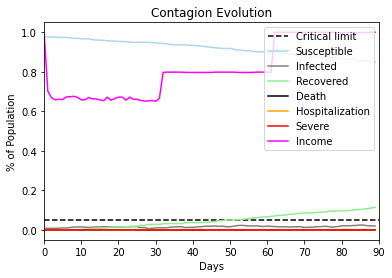

In [33]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [34]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[5970, 3679, 7300, 8250, 4928, 6588, 5700, 7196, 5920, 956, 6599, 4346, 6738, 6818, 4888, 1129, 108, 7571, 8743, 6470, 4581, 6119, 7705, 1155, 3027, 7534, 9555, 86, 2612, 934]
run with seed 5970:
run with seed 3679:
run with seed 7300:
run with seed 8250:
run with seed 4928:
run with seed 6588:
run with seed 5700:
run with seed 7196:
run with seed 5920:
run with seed 956:
run with seed 6599:
run with seed 4346:
run with seed 6738:
run with seed 6818:
run with seed 4888:
run with seed 1129:
run with seed 108:
run with seed 7571:
run with seed 8743:
run with seed 6470:
run with seed 4581:
run with seed 6119:
run with seed 7705:
run with seed 1155:
run with seed 3027:
run with seed 7534:
run with seed 9555:
run with seed 86:
run with seed 2612:
run with seed 934:
using average of time series:
stats on susceptible:
data: [0.9830339321357286, 0.5992777777777778, 0.9015318015318015, 0.9632777777777779, 0.9543888888888887, 0.8674222222222222, 0

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [35]:
sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

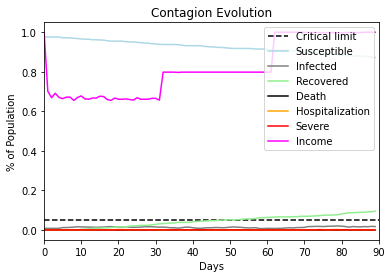

In [36]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [37]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=2,do_print = True)

Save these seeds if you want to rerun a scenario
[2536, 6968]
run with seed 2536:
run with seed 6968:
using average of time series:
stats on susceptible:
data: [0.9636111111111111, 0.9774444444444448]
min:
0.9636111111111111
max:
0.9774444444444448
std:
0.006916666666666849
mean:
0.9705277777777779
median:
0.9705277777777779
95% confidence interval for the mean:
(0.8826431950174536,1.0584123605381022)
using average of time series:
stats on infected:
data: [0.003577777777777778, 0.002177777777777778]
min:
0.002177777777777778
max:
0.003577777777777778
std:
0.0006999999999999999
mean:
0.0028777777777777777
median:
0.0028777777777777777
95% confidence interval for the mean:
(-0.0060165655377246875,0.011772121093280243)
using average of time series:
stats on recovered:
data: [0.02081111111111111, 0.012377777777777776]
min:
0.012377777777777776
max:
0.02081111111111111
std:
0.004216666666666667
mean:
0.016594444444444443
median:
0.016594444444444443
95% confidence interval for the mean:
(-0

(<function dict.items>, <function dict.items>, <function dict.items>)